<div style=" background-color: orange;" >

<h1 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">Machine learning </h1>

<h2 style="margin: auto; padding: 20px 0; color:#fff; text-align: center"> Prediction projet complet sur les vrais et faux billets en euros</h2>

</div>


-PROJET : Détection automatique de faux billets en euros 
    
-CONTEXTE : Machine Learning supervisé et non supervisé, avec interface API et Web


<div style=" background-color: green;" >

<h2 style="margin: auto; padding: 20px; color:#fff; ">Context - Nous souhaitons mettre en place un algorithme capable de différencier
automatiquement les vrais des faux billets en euros, à partir de leurs
caractéristiques géométriques mesurées par une machine.
Ce projet s’inscrit dans une démarche de lutte contre la contrefaçon de billets</h2>

</div>

<div style=" background-color: orange;" >

<h2 style="margin: auto; padding: 20px; color:#fff; ">Objectifs - Une machine mesure plusieurs dimensions sur chaque billet.
Au fil des années, des différences systématiques ont été détectées entre les vrais et
les faux billets, invisibles à l’œil nu, mais exploitables par un algorithme.
L’objectif est donc de construire un modèle capable, à partir de ces mesures
géométriques, de prédire si un billet est vrai ou faux.</h2>

</div>

<div style=" background-color: green;" >

<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 1 - Analyse Exploratoire des vrais et faux billets</h2>

</div>

Objectifs :

- Charger et explorer les données des Vrais et faux billets

- Nettoyer et préparer les données

- Machine Learning

- Verification des prédictions

1.1 - Importation des libraries

In [1]:
#import des libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


1.2 Chargement du dataset d'entrainement et affichage des premières lignes

In [2]:
df = pd.read_csv("billets.csv" , sep = ';' )


In [3]:
df.head(3)


,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16


In [4]:
#Aperçu des informations générales
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   bool   
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1463 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 71.9 KB


1.3 Analyse exploratoire statistiques du df

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
diagonal,1500.0,171.958440,0.305195,171.04,171.750,171.96,172.17,173.01
height_left,1500.0,104.029533,0.299462,103.14,103.820,104.04,104.23,104.88
height_right,1500.0,103.920307,0.325627,102.82,103.710,103.92,104.15,104.95
margin_low,1463.0,4.485967,0.663813,2.98,4.015,4.31,4.87,6.90
margin_up,1500.0,3.151473,0.231813,2.27,2.990,3.14,3.31,3.91
length,1500.0,112.678500,0.872730,109.49,112.030,112.96,113.34,114.44


In [6]:
#Statistiques descriptives des variables géométriques
df.describe()


,diagonal,height_left,height_right,margin_low,margin_up,length
count,1500.000000,1500.000000,1500.000000,1463.000000,1500.000000,1500.00000
mean,171.958440,104.029533,103.920307,4.485967,3.151473,112.67850
std,0.305195,0.299462,0.325627,0.663813,0.231813,0.87273
min,171.040000,103.140000,102.820000,2.980000,2.270000,109.49000
25%,171.750000,103.820000,103.710000,4.015000,2.990000,112.03000
50%,171.960000,104.040000,103.920000,4.310000,3.140000,112.96000
75%,172.170000,104.230000,104.150000,4.870000,3.310000,113.34000
max,173.010000,104.880000,104.950000,6.900000,3.910000,114.44000


1.4 - Idenitifiez les variables numériques et catégorielles

In [7]:
#variables numériques

variables_numeriques = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print("Variables numériques :", variables_numeriques)

Variables numériques : ['diagonal', 'height_left', 'height_right', 'margin_low', 'margin_up', 'length']


In [8]:
#variables catégorielle

variables_categorielles = df.select_dtypes(include=['object']).columns.tolist()
print("Variables catégorielles :", variables_categorielles)

Variables catégorielles : []



1.5 - Identifiez la nature de chaque variable

In [9]:
df.dtypes

is_genuine         bool
diagonal        float64
height_left     float64
height_right    float64
margin_low      float64
margin_up       float64
length          float64
dtype: object

1.6 - Affichage des classes (vrai ou faux billet)



Répartition des classes :
True     1000
False     500
Name: is_genuine, dtype: int64


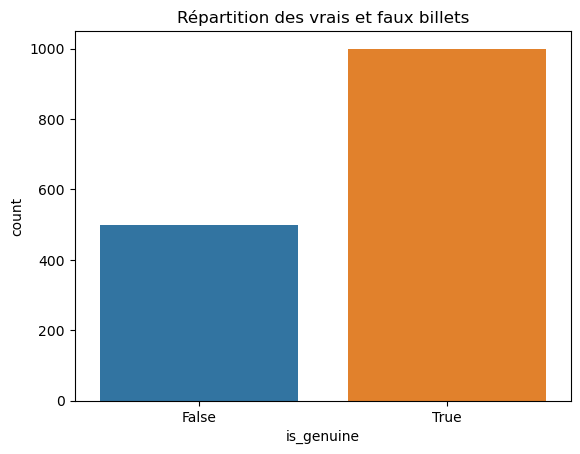

In [10]:
print("\nRépartition des classes :")
print(df["is_genuine"].value_counts())
sns.countplot(data=df, x="is_genuine")
plt.title("Répartition des vrais et faux billets")
plt.show()

1.7 Corrélation entre les variables


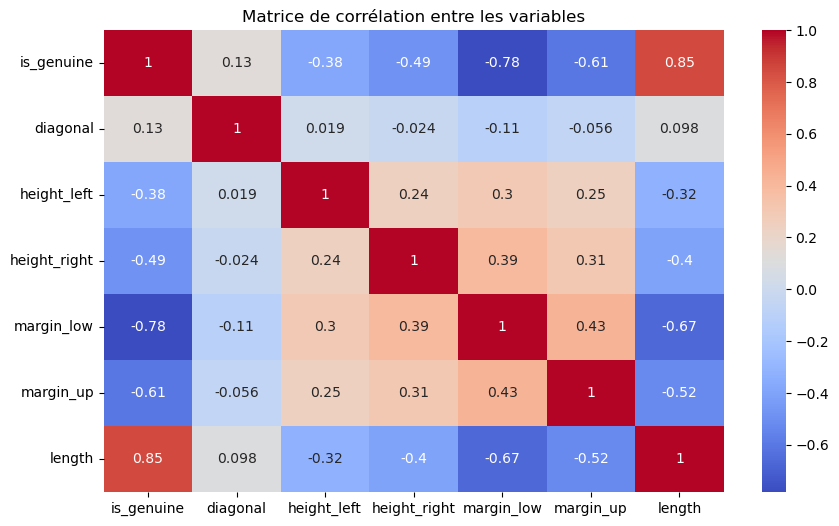

In [11]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Matrice de corrélation entre les variables")
plt.show()

1.8 Visualisation des variables

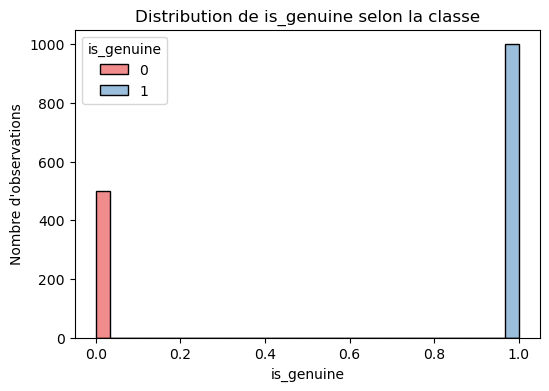

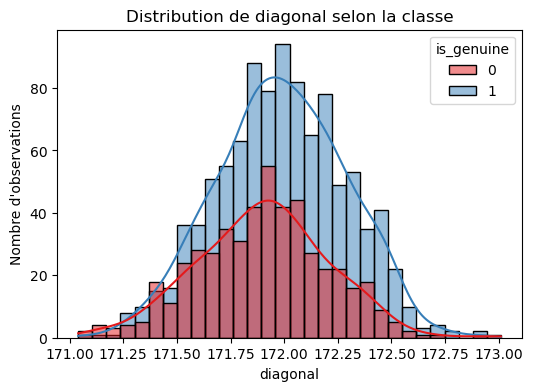

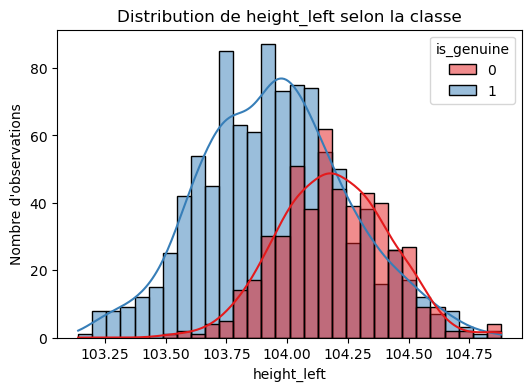

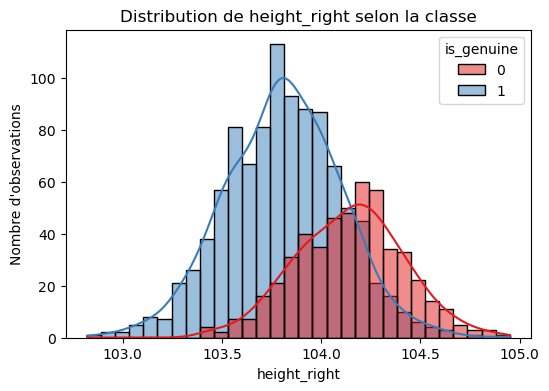

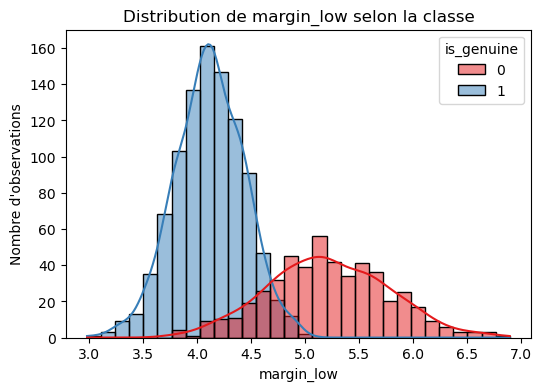

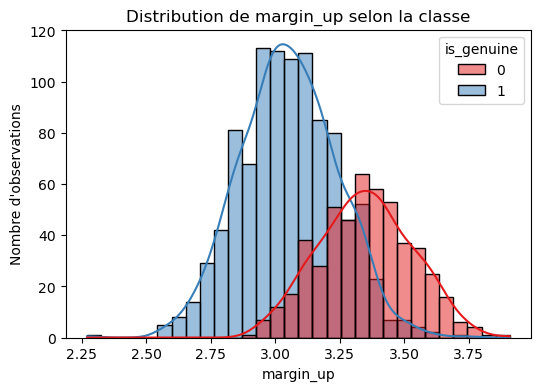

In [12]:
# toutes les colonnes sauf "is_genuine"
# Si is_genuine est booléen, le convertir en int (0/1)
df["is_genuine"] = df["is_genuine"].astype(int)

cols = df.columns[:-1] 
for col in cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(data=df, x=col, hue="is_genuine", kde=True, palette="Set1", bins=30)
    plt.title(f"Distribution de {col} selon la classe")
    plt.xlabel(col)
    plt.ylabel("Nombre d'observations")
    plt.show()


<div style="background-color: green;" >

<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 2 - Nettoyage et préparation des données</h2>

</div>

In [13]:
#retourner le nom des colonnes de mon df

df.columns

Index(['is_genuine', 'diagonal', 'height_left', 'height_right', 'margin_low',
       'margin_up', 'length'],
      dtype='object')

Identification des valeurs nulles(NAN)



In [14]:
pd.isnull(df).sum()

is_genuine       0
diagonal         0
height_left      0
height_right     0
margin_low      37
margin_up        0
length           0
dtype: int64

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   int32  
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1463 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: float64(6), int32(1)
memory usage: 76.3 KB




2.1 Séparation des variables explicatives (X) et de la cible (y)

    

In [16]:
# La cible
y = df["is_genuine"].astype(int)

# Les features
X = df.drop(columns=["is_genuine"])


-2.2 Division en jeu d'entraînement / test (80% / 20%)

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)

print("X_train :", X_train.shape, " | X_test :", X_test.shape)
print("y_train :", y_train.shape, " | y_test :", y_test.shape)


X_train : (1200, 6)  | X_test : (300, 6)
y_train : (1200,)  | y_test : (300,)


-2.3 Imputation puis Normalisation des variables numériques

In [18]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

num_cols = X_train.columns.tolist()  # toutes les colonnes numériques

# 1) Imputation sur train puis application sur test
imputer = SimpleImputer(strategy="median")
X_train_imputed = imputer.fit_transform(X_train[num_cols])
X_test_imputed  = imputer.transform(X_test[num_cols])

# 2) Scaling sur train imputé puis application sur test imputé
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled  = scaler.transform(X_test_imputed)

# 3) Remettre en DataFrame (facultatif, mais pratique)
X_train_imputed_df = pd.DataFrame(X_train_imputed, columns=num_cols, index=X_train.index)
X_test_imputed_df  = pd.DataFrame(X_test_imputed,  columns=num_cols, index=X_test.index)

X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=num_cols, index=X_train.index)
X_test_scaled_df  = pd.DataFrame(X_test_scaled,  columns=num_cols, index=X_test.index)

# 4) Contrôles "anti-surprises"
print("NaN (train_imputed) :", np.isnan(X_train_imputed).sum())
print("NaN (test_imputed)  :", np.isnan(X_test_imputed).sum())
print("NaN (train_scaled)  :", np.isnan(X_train_scaled).sum())
print("NaN (test_scaled)   :", np.isnan(X_test_scaled).sum())


NaN (train_imputed) : 0
NaN (test_imputed)  : 0
NaN (train_scaled)  : 0
NaN (test_scaled)   : 0


<div style="background-color: green;" >

<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 3 -Modelisations</h2>

</div>

-3.1 Séparation du jeu de données

In [19]:
from sklearn.model_selection import train_test_split

# Séparer les variables indépendantes (X) et la variable cible (y)
X = df.drop(columns=["is_genuine"])
y = df["is_genuine"]

# Division en données d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Formes des jeux de données :")
print("X_train :", X_train.shape)
print("X_test  :", X_test.shape)


Formes des jeux de données :
X_train : (1200, 6)
X_test  : (300, 6)


 3.2 Normalisation des variables

In [20]:
#La normalisation est cruciale pour la régression logistique et KNN.
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Colonnes numériques
num_cols = ["diagonal", "height_left", "height_right", "margin_low", "margin_up", "length"]

# Étape 1 : Imputation
imputer = SimpleImputer(strategy="median")  
X_train_imputed = imputer.fit_transform(X_train[num_cols])
X_test_imputed  = imputer.transform(X_test[num_cols])

# Étape 2 : Normalisation
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled  = scaler.transform(X_test_imputed)



3.3 Régression Logistique

In [21]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(solver="saga", max_iter=1000, random_state=42)
log_model.fit(X_train_scaled_df, y_train)

y_pred_log = log_model.predict(X_test_scaled_df)


In [22]:
print("Prédictions (10 premiers billets) :", y_pred_log[:10])


Prédictions (10 premiers billets) : [1 0 0 1 1 1 1 1 1 1]


3.4 – Évaluation du modèle

Accuracy : 0.9900 | Precision : 0.9900 | Recall : 0.9950 | F1 : 0.9925

Rapport de classification :
              precision    recall  f1-score   support

        Faux       0.99      0.98      0.98       100
        Vrai       0.99      0.99      0.99       200

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300



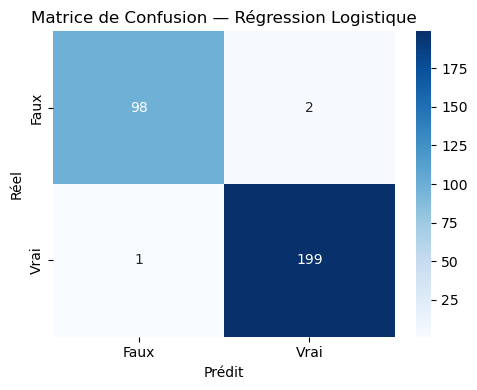

TN=98 | FP=2 | FN=1 | TP=199
AUC : 0.9995


C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [23]:
# 3.4 — Évaluation du modèle (Régression Logistique)

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, roc_auc_score
)
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Scores principaux
acc  = accuracy_score(y_test, y_pred_log)
prec = precision_score(y_test, y_pred_log)
rec  = recall_score(y_test, y_pred_log)
f1   = f1_score(y_test, y_pred_log)

print(f"Accuracy : {acc:.4f} | Precision : {prec:.4f} | Recall : {rec:.4f} | F1 : {f1:.4f}\n")
print("Rapport de classification :")
print(classification_report(y_test, y_pred_log, target_names=["Faux", "Vrai"]))

# Matrice de confusion + TN/FP/FN/TP
cm = confusion_matrix(y_test, y_pred_log, labels=[0, 1])
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Faux", "Vrai"], yticklabels=["Faux", "Vrai"])
plt.xlabel("Prédit")
plt.ylabel("Réel")
plt.title("Matrice de Confusion — Régression Logistique")
plt.tight_layout()
plt.show()

tn, fp, fn, tp = cm.ravel()
print(f"TN={tn} | FP={fp} | FN={fn} | TP={tp}")

# (optionnel) AUC si les probabilités sont disponibles
try:
    y_proba_log = log_model.predict_proba(X_test_scaled)[:, 1]
    auc = roc_auc_score(y_test, y_proba_log)
    print(f"AUC : {auc:.4f}")
except Exception:
    pass


3.5 – K-Nearest Neighbors (KNN)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)



KNN — Accuracy : 0.9833 | Precision : 0.9851 | Recall : 0.9900 | F1 : 0.9875

Rapport de classification :
              precision    recall  f1-score   support

        Faux       0.98      0.97      0.97       100
        Vrai       0.99      0.99      0.99       200

    accuracy                           0.98       300
   macro avg       0.98      0.98      0.98       300
weighted avg       0.98      0.98      0.98       300



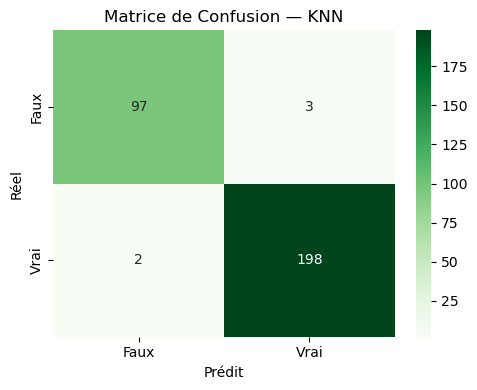

TN=97 | FP=3 | FN=2 | TP=198
AUC : 0.9971


In [24]:
# 3.5 — Modèle KNN

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, roc_auc_score
)
import seaborn as sns
import matplotlib.pyplot as plt

# Création et entraînement du modèle
knn_model = KNeighborsClassifier(n_neighbors=5)  # tu peux tuner ce paramètre
knn_model.fit(X_train_scaled, y_train)

# Prédictions
y_pred_knn = knn_model.predict(X_test_scaled)

# Évaluation
acc  = accuracy_score(y_test, y_pred_knn)
prec = precision_score(y_test, y_pred_knn)
rec  = recall_score(y_test, y_pred_knn)
f1   = f1_score(y_test, y_pred_knn)

print(f"\nKNN — Accuracy : {acc:.4f} | Precision : {prec:.4f} | Recall : {rec:.4f} | F1 : {f1:.4f}")
print("\nRapport de classification :")
print(classification_report(y_test, y_pred_knn, target_names=["Faux", "Vrai"]))

# Matrice de confusion
cm = confusion_matrix(y_test, y_pred_knn, labels=[0, 1])
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=["Faux", "Vrai"], yticklabels=["Faux", "Vrai"])
plt.xlabel("Prédit")
plt.ylabel("Réel")
plt.title("Matrice de Confusion — KNN")
plt.tight_layout()
plt.show()

# Décomposition TN/FP/FN/TP
tn, fp, fn, tp = cm.ravel()
print(f"TN={tn} | FP={fp} | FN={fn} | TP={tp}")

# (optionnel) AUC si predict_proba est dispo
try:
    y_proba_knn = knn_model.predict_proba(X_test_scaled)[:, 1]
    auc = roc_auc_score(y_test, y_proba_knn)
    print(f"AUC : {auc:.4f}")
except Exception:
    pass


3.6 – Modèle 3 : Random Forest


Random Forest Accuracy: 0.99
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       100
           1       0.99      0.99      0.99       200

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300



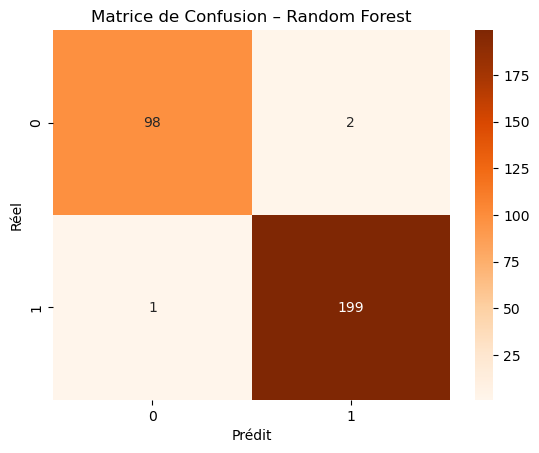

TN=98 | FP=2 | FN=1 | TP=199
AUC : 0.9990


In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# --- Nettoyage des NaN/Inf (sécurité)
X_train_rf = np.nan_to_num(X_train, nan=np.nanmean(X_train))
X_test_rf  = np.nan_to_num(X_test, nan=np.nanmean(X_test))

# --- Modèle Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_rf, y_train)

# --- Prédictions
y_pred_rf = rf_model.predict(X_test_rf)

# --- Évaluation
print("\nRandom Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

# Matrice de confusion
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges')
plt.title("Matrice de Confusion – Random Forest")
plt.xlabel("Prédit")
plt.ylabel("Réel")
plt.show()

# --- Décomposition TN/FP/FN/TP
tn, fp, fn, tp = cm.ravel()
print(f"TN={tn} | FP={fp} | FN={fn} | TP={tp}")

# --- AUC (si proba dispo)
try:
    y_proba_rf = rf_model.predict_proba(X_test_rf)[:, 1]
    auc = roc_auc_score(y_test, y_proba_rf)
    print(f"AUC : {auc:.4f}")
except Exception:
    print(" AUC non disponible pour ce modèle")


3.7-MK-means (non supervisé)


K-means : Évaluation non supervisée
➡ Mapping choisi : Clusters inversés (meilleure correspondance)
Adjusted Rand Index : 0.9465770623742454
Accuracy (après mapping) : 0.9866666666666667

Rapport de classification :
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       100
           1       0.99      0.99      0.99       200

    accuracy                           0.99       300
   macro avg       0.98      0.98      0.98       300
weighted avg       0.99      0.99      0.99       300



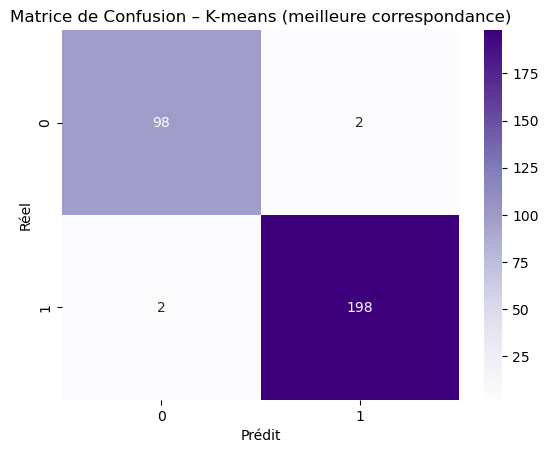

TN=98 | FP=2 | FN=2 | TP=198


In [28]:
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score, confusion_matrix, accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# --- Modèle K-means
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
kmeans.fit(X_train_scaled)
kmeans_pred = kmeans.predict(X_test_scaled)

# --- Vérification du mapping (car cluster 0 ≠ classe 0 forcément)
cm1 = confusion_matrix(y_test, kmeans_pred)
cm2 = confusion_matrix(y_test, 1 - kmeans_pred)

if cm1.trace() > cm2.trace():
    final_kmeans_pred = kmeans_pred
    cm_final = cm1
    mapping = "Clusters utilisés tels quels"
else:
    final_kmeans_pred = 1 - kmeans_pred
    cm_final = cm2
    mapping = "Clusters inversés (meilleure correspondance)"

# --- Évaluations
print("\nK-means : Évaluation non supervisée")
print("➡ Mapping choisi :", mapping)
print("Adjusted Rand Index :", adjusted_rand_score(y_test, final_kmeans_pred))
print("Accuracy (après mapping) :", accuracy_score(y_test, final_kmeans_pred))
print("\nRapport de classification :")
print(classification_report(y_test, final_kmeans_pred))

# --- Matrice de confusion
sns.heatmap(cm_final, annot=True, fmt='d', cmap='Purples')
plt.title("Matrice de Confusion – K-means (meilleure correspondance)")
plt.xlabel("Prédit")
plt.ylabel("Réel")
plt.show()

# --- Décomposition TN/FP/FN/TP
tn, fp, fn, tp = cm_final.ravel()
print(f"TN={tn} | FP={fp} | FN={fn} | TP={tp}")


3.8 – Comparaison globale

In [30]:
print("\nComparaison des précisions :")
print("Logistic Regression:", accuracy_score(y_test, y_pred_log))
print("KNN:", accuracy_score(y_test, y_pred_knn))
print("Random Forest:", accuracy_score(y_test, y_pred_rf))
print("KMeans (apres mapping):", accuracy_score(y_test, final_kmeans_pred))


Comparaison des précisions :
Logistic Regression: 0.99
KNN: 0.9833333333333333
Random Forest: 0.99
KMeans (apres mapping): 0.9866666666666667


In [31]:
#les comparaison vizualisations


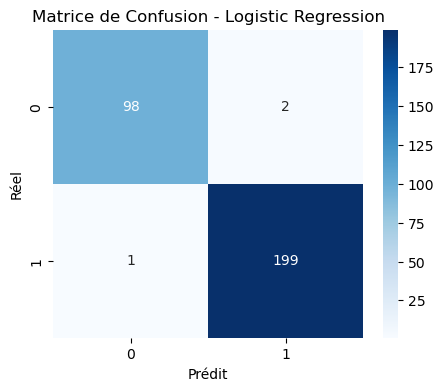

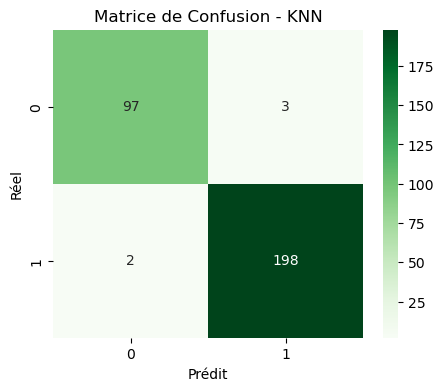

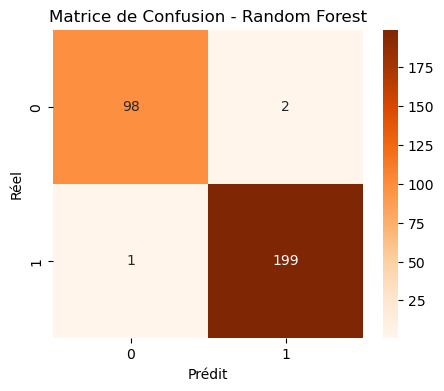

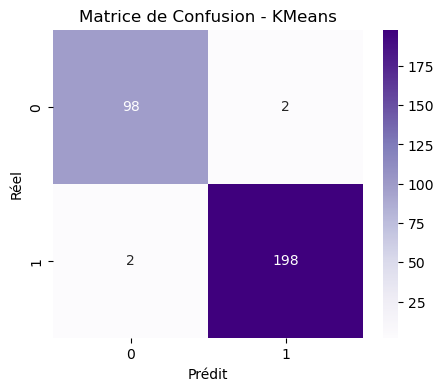

In [32]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# --- 1. Logistic Regression ---
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred_log), annot=True, fmt="d", cmap="Blues")
plt.title("Matrice de Confusion - Logistic Regression")
plt.xlabel("Prédit")
plt.ylabel("Réel")
plt.show()

# --- 2. KNN ---
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt="d", cmap="Greens")
plt.title("Matrice de Confusion - KNN")
plt.xlabel("Prédit")
plt.ylabel("Réel")
plt.show()

# --- 3. Random Forest ---
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt="d", cmap="Oranges")
plt.title("Matrice de Confusion - Random Forest")
plt.xlabel("Prédit")
plt.ylabel("Réel")
plt.show()

# --- 4. KMeans ---
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, final_kmeans_pred), annot=True, fmt="d", cmap="Purples")
plt.title("Matrice de Confusion - KMeans")
plt.xlabel("Prédit")
plt.ylabel("Réel")
plt.show()


<div style="background-color: green;" >

<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 4- Verification des predictions</h2>

</div>

In [33]:
import joblib
import pandas as pd

# === Chargement des modèles et du scaler ===
log_model = joblib.load("log_model_7_08_2025.sav")
knn_model = joblib.load("knn_model_7_08_2025.sav")
kmeans_model = joblib.load("kmeans_model_7_08_2025.sav")
rf_model = joblib.load("rf_model_7_08_2025.sav")
scaler = joblib.load("standard_scaler.sav")

# === Exemple de billet sans étiquette ===
nouveau_billet = pd.DataFrame([{
    "length": 135.6,
    "height_left": 74.2,
    "height_right": 74.0,
    "margin_low": 4.2,
    "margin_up": 4.0,
    "diagonal": 145.5
}])

# Normalisation avec le même scaler utilisé pendant l’entraînement
nouveau_billet_scaled = scaler.transform(nouveau_billet)

# === Prédictions ===
print("=== Prédiction sur un nouveau billet ===")
print("- Logistic Regression :", log_model.predict(nouveau_billet_scaled)[0])
print("- KNN :", knn_model.predict(nouveau_billet_scaled)[0])
print("- K-means :", kmeans_model.predict(nouveau_billet_scaled)[0])

#  Random Forest n’a pas besoin du scaler
print("- Random Forest :", rf_model.predict(nouveau_billet)[0])


=== Prédiction sur un nouveau billet ===
- Logistic Regression : 1
- KNN : 1
- K-means : 0
- Random Forest : 1


C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.

<div style="background-color: green;" >

<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 5 - Enregistrez le Modèle</h2>

</div>

In [34]:
import joblib

# Enregistrement des modèles
joblib.dump(log_model, "log_model_25_08_2025.sav")
joblib.dump(knn_model, "knn_model_25_08_2025.sav")
joblib.dump(kmeans_model, "kmeans_model_25_08_2025.sav")
joblib.dump(rf_model, "rf_model_25_08_2025.sav")

# Enregistrement du scaler utilisé normalisation
joblib.dump(scaler, "standard_scaler.sav")

print("Modèles et scaler enregistrés avec succès.")


Modèles et scaler enregistrés avec succès.
